In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os                                    #import libraries



In [45]:
import os

os.path.exists(r'C:\Users\Pradeep\OneDrive\Desktop\Intern Projects\New Year Sales Data.csv')


True

In [69]:
df = pd.read_csv(r'C:\Users\Pradeep\OneDrive\Desktop\Intern Projects\New Year Sales Data.csv')


In [70]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [72]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [73]:
df.drop(["Status" ,"unnamed1"], axis=1, inplace=True)


In [74]:

df['Amount'] = df['Amount'].fillna(df['Amount'].median())

In [75]:
# Convert Amount to integer
df['Amount'] = df['Amount'].astype(int)

In [77]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11251 non-null  int64 
 1   Cust_name         11251 non-null  object
 2   Product_ID        11251 non-null  object
 3   Gender            11251 non-null  object
 4   Age Group         11251 non-null  object
 5   Age               11251 non-null  int64 
 6   Marital_Status    11251 non-null  int64 
 7   State             11251 non-null  object
 8   Zone              11251 non-null  object
 9   Occupation        11251 non-null  object
 10  Product_Category  11251 non-null  object
 11  Orders            11251 non-null  int64 
 12  Amount            11251 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.1+ MB


In [76]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9452.176429
std,1.716125e+03,12.754122,0.493632,1.115047,5219.753707
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [79]:
for col in df.columns:
    print(col, df[col].nunique())
  #for unique value check

User_ID 3755
Cust_name 1250
Product_ID 2351
Gender 2
Age Group 7
Age 81
Marital_Status 2
State 16
Zone 5
Occupation 15
Product_Category 18
Orders 4
Amount 6583


<Axes: xlabel='Gender', ylabel='count'>

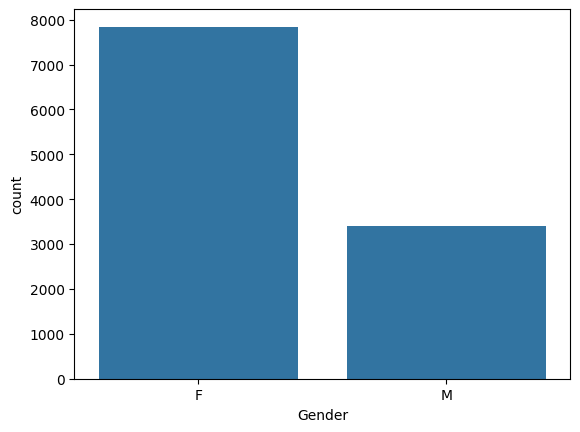

In [85]:
#gender analysis

sns.countplot(data=df,x="Gender")

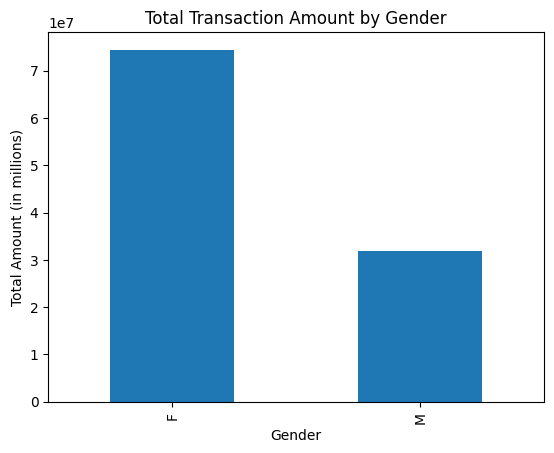

In [83]:
#Transaction by gender

df.groupby("Gender")["Amount"].sum().plot(kind="bar")
plt.ylabel("Total Amount (in millions)")
plt.xlabel("Gender")
plt.title("Total Transaction Amount by Gender")
plt.show()

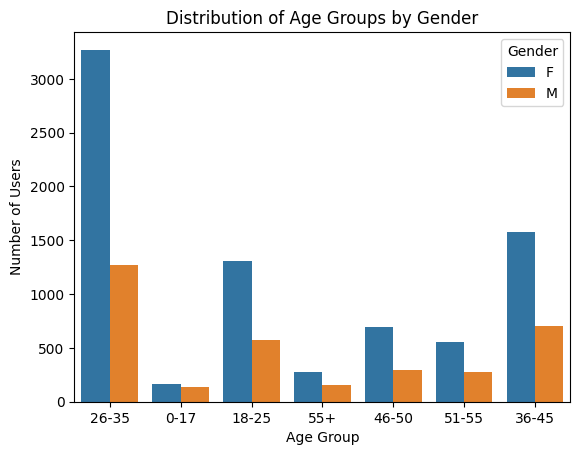

In [88]:
#Age analysis



sns.countplot(data=df, x="Age Group", hue="Gender")
plt.title("Distribution of Age Groups by Gender")
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.show()


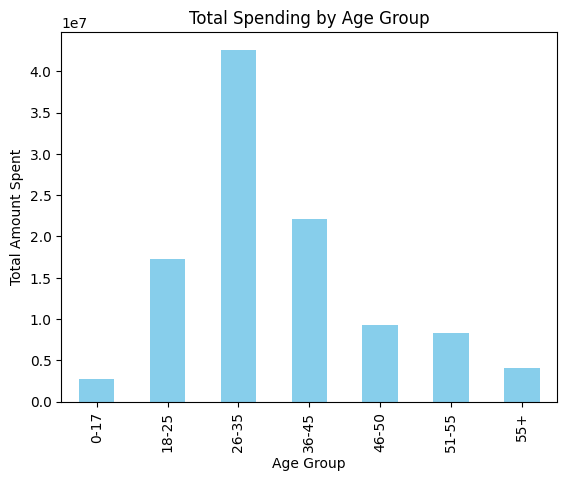

In [89]:

df.groupby("Age Group")["Amount"].sum().plot(kind="bar", color='skyblue')
plt.title("Total Spending by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Amount Spent")
plt.show()



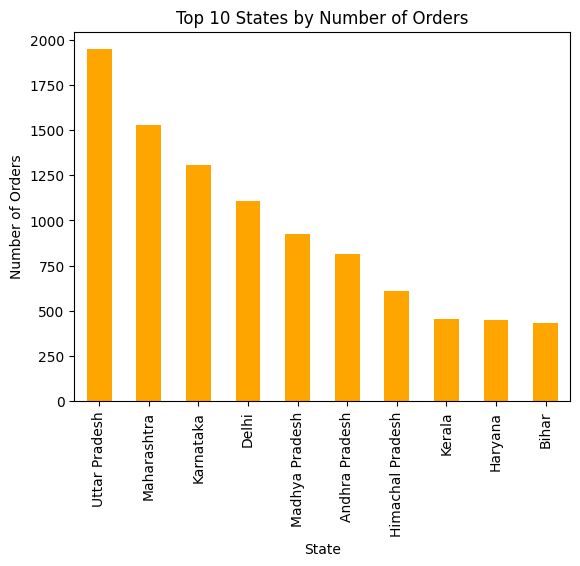

In [93]:
#state analysis
top_states_orders.plot(kind="bar", color="orange")
plt.title("Top 10 States by Number of Orders")
plt.xlabel("State")
plt.ylabel("Number of Orders")
plt.show()

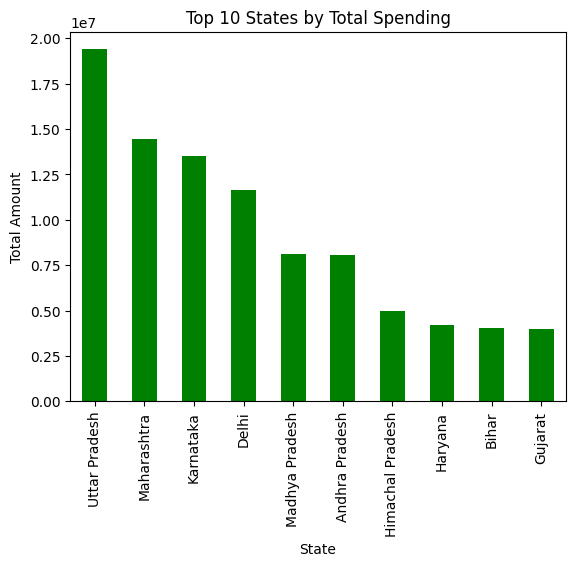

In [97]:
top_states_amount = df.groupby("State")["Amount"].sum().sort_values(ascending=False).head(10)
top_states_amount.plot(kind="bar" ,color="green")
plt.title("Top 10 States by Total Spending")
plt.xlabel("State")
plt.ylabel("Total Amount")
plt.show()


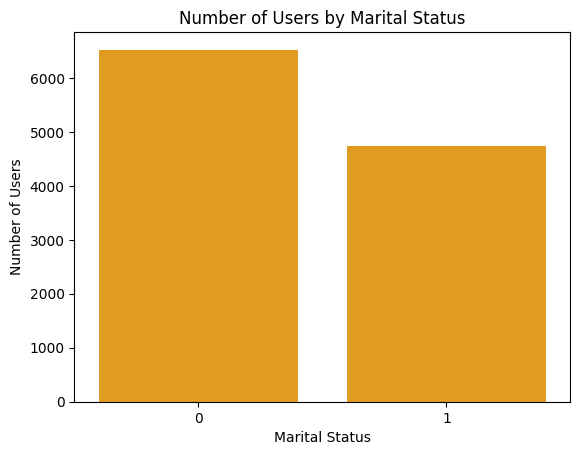

In [103]:
#Marital Status Analysis

sns.countplot(data=df, x="Marital_Status", color="orange")
plt.title("Number of Users by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Number of Users")
plt.show()


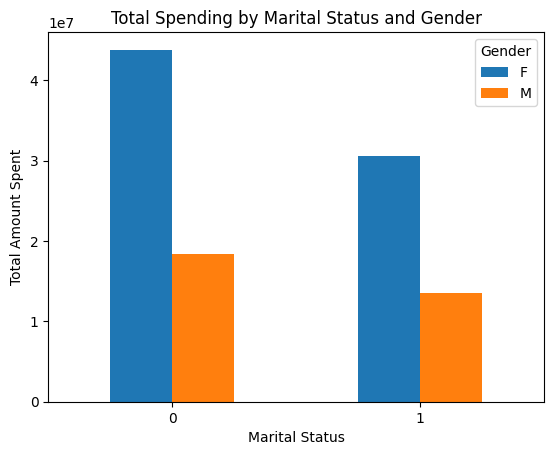

In [104]:
df.groupby(["Marital_Status", "Gender"])["Amount"].sum().unstack().plot(kind="bar")
plt.title("Total Spending by Marital Status and Gender")
plt.xlabel("Marital Status")
plt.ylabel("Total Amount Spent")
plt.xticks(rotation=0)
plt.show()

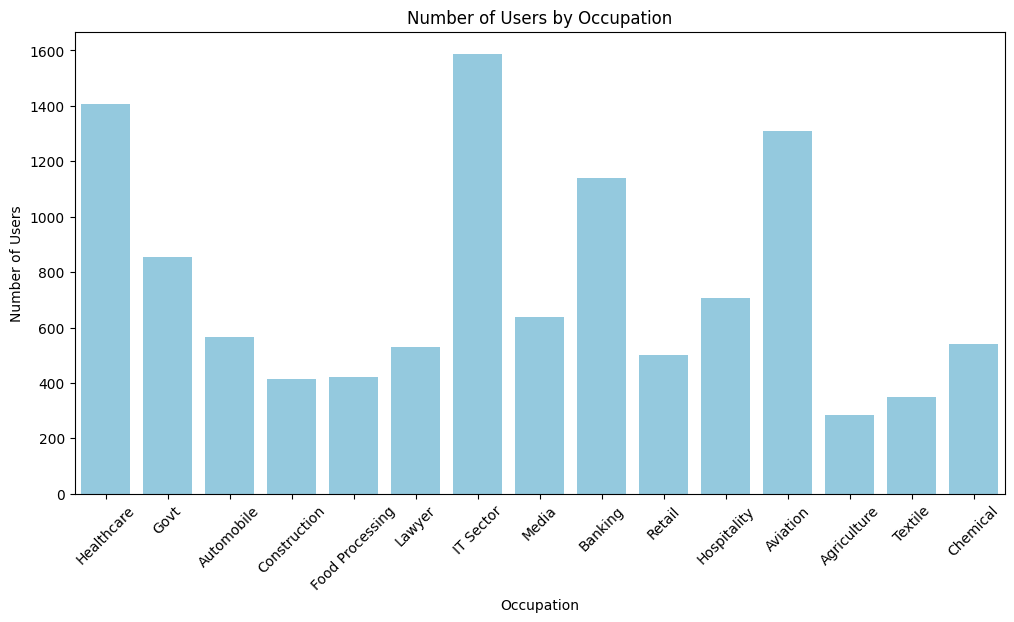

In [105]:
#Occupation Analysis


plt.figure(figsize=(12,6))  # make the plot wider if there are many occupations
sns.countplot(data=df, x="Occupation", color="skyblue")
plt.title("Number of Users by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)  # rotate x labels for readability
plt.show()

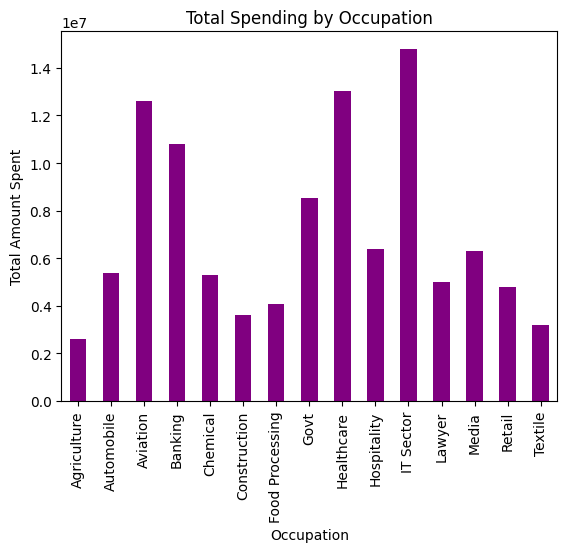

In [111]:
df.groupby("Occupation")["Amount"].sum().plot(kind="bar", color="purple")
plt.title("Total Spending by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Total Amount Spent")
plt.xticks(rotation=90)  # rotate labels for readability
plt.show()

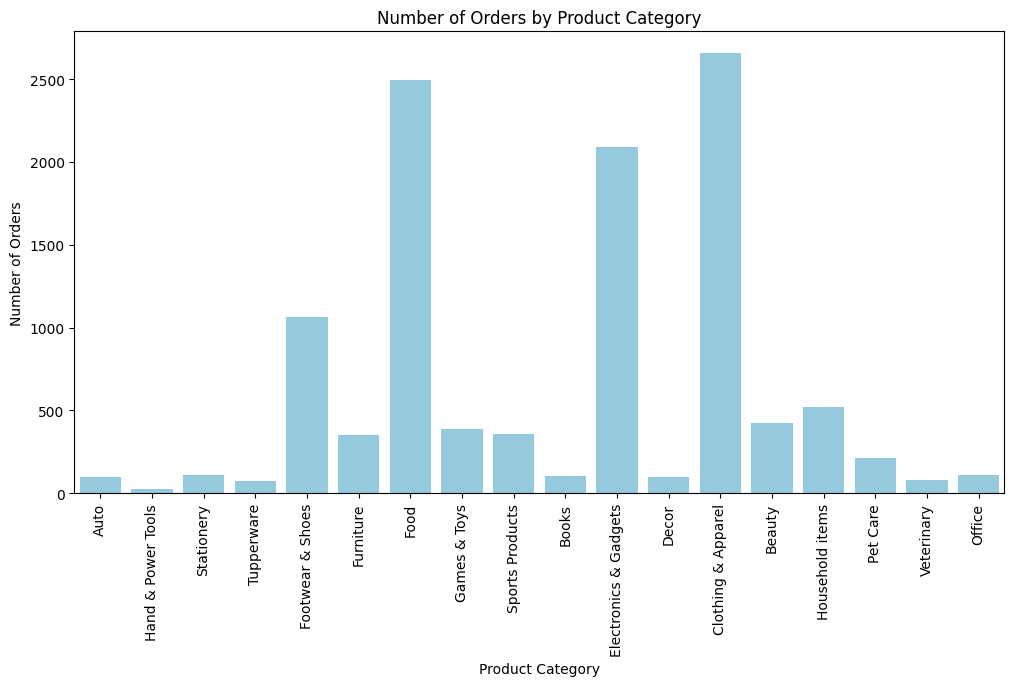

In [110]:
#Product Category Analysis


plt.figure(figsize=(12,6))  # wider figure for readability
sns.countplot(data=df, x="Product_Category", color="skyblue")
plt.title("Number of Orders by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Number of Orders")
plt.xticks(rotation=90)  # rotate x-axis labels for clarity
plt.show()

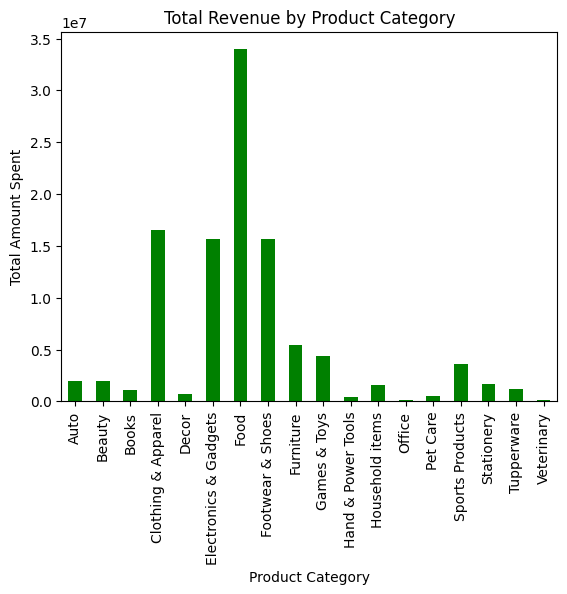

In [109]:
df.groupby("Product_Category")["Amount"].sum().plot(kind="bar", color="green")
plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Amount Spent")
plt.xticks(rotation=90)  # make labels readable
plt.show()

# 📌 Conclusion

